<div style="width: 40%; clear: both;">
<div style="float: left; width: 20%;">
<img src="https://apps.utpl.edu.ec/sgtt/img/utpl_icono.png", align="left" width="280" height="120">
</div>
</div>
<div style="float: right; width: 70%;">
<p style="margin: 0; padding-top: 32px; text-align:right; color:#003366; font-size:16px"><u>Metodos de Aprendizaje de Maquina</u></p>
<p style="margin: 0; text-align:right; color:#999999; font-size:17px">Maestría en Inteligencia Artificial Aplicada</p>
</div>
</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

# Trabajo académico final Métodos Aprendizaje de Máquina

## Proyecto académico final

- Nombres: Noemí Peñafiel, Roberto Ramos
- Fecha: 20 de Julio de 2025
# Descripción del Dataset:
#####  1. Age	                     Este campo indica la edad del empleado (Rango de 18 a 60).
#####  2. Education	                 Este campo Indica el Nivel educativo del empleado (Rango de 1 a 5).
#####  3. JobLevel	                 Nivel del puesto dentro de la empresa (Rango de 1 a 5).
#####  4. JobSatisfaction	         Medicion de la satisfacción del empleado con su trabajo (Rango de 1 a 4).
#####  5. NumCompaniesWorked	     Número de empresas en las que el empleado ha trabajado (Rango 0 a 9).
#####  6. TrainingTimesLastYear	     Indica cuantas veces el empleado tuvo capacitacion durante el último año (Rango 0 a 6).
#####  7. YearsAtCompany	         Estabilidad en Años del empleado en la empresa actual (Rango 0 a 40).
#####  8. YearsInCurrentRole	     Cuantos años el empleado tiene el cargo actual (Rango 0 a 17).
#####  9. YearsSinceLastPromotion	 Hace cuantos Años fue la ultimo ascenso en la empresa (Rango 0 a 15).
##### 10. YearsWithCurrManager	     Cuantos años el empleado ha trabajado con su actual jefe (Rango 0 a 17).

###   Campo Attrition  es categorica si ha Renunciado o no el Empleado


In [2]:
import pandas as pd
import numpy as np
import os
os.chdir('..')

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import copy

data = pd.read_csv(r'C:\Maestria\Aprendizaje Maquina\Trabajo FInal\MujeresNum.csv', delimiter=';', encoding='unicode_escape',)


In [115]:
data.shape

(588, 11)

In [284]:
# A travez de skimpy podemos ver una exploracion rapida estadístico y descriptivo  de nuestro DataSet 
from skimpy import skim
skim(data) 


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 588    │ │ int64       │ 10    │                                                          │
│ │ Number of columns │ 11     │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column                     ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0  ┃ p25  ┃ p50  ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ Age                        │   0 │      0 │   37.33 │   9.266 │  18 │   31 │   36 │   44 │    60 │ ▂▆▇▅▃▂  │  │
│ │ Education                  │   0 │      0 │   2.934 │   1.008 │   1 │    2 │    3 │    4 │     5 │ ▂▃ ▇▅▁  │  │
│ │ JobLevel                   │   0 │      0 │   2.117 │   1.096 │   1 │    1 │    2 │    3 │     5 │ ▇▇ ▃▂▁  │  │
│ │ JobSatisfaction            │   0 │      0 │   2.684 │   1.096 │   1 │    2 │    3 │    4 │     4 │ ▅ ▅ ▇▇  │  │
│ │ NumCompaniesWorked         │   0 │      0 │   2.813 │   2.536 │   0 │    1 │    2 │    4 │     9 │ ▇▂▃▁▂▁  │  │
│ │ TrainingTimesLastYear      │   0 │      0 │   2.861 │   1.317 │   0 │    2 │    3 │    3 │     6 │ ▁▁▇▇▂▃  │  │
│ │ YearsAtCompany             │   0 │      0 │   7.231 │   6.004 │   0 │    3 │    5 │   10 │    40 │  ▇▅▁▁   │  │
│ │ YearsInCurrentRole         │   0 │      0 │   4.413 │   3.769 │   0 │    2 │    3 │    7 │    17 │  ▇▃▅▁▁  │  │
│ │ YearsSinceLastPromotion    │   0 │      0 │   2.294 │   3.272 │   0 │    0 │    1 │    3 │    15 │   ▇▁▁   │  │
│ │ YearsWithCurrManager       │   0 │      0 │   4.257 │   3.642 │   0 │    2 │    3 │    7 │    17 │  ▇▃▅▁▁  │  │
│ └────────────────────────────┴─────┴────────┴─────────┴─────────┴─────┴──────┴──────┴──────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓  │
│ ┃ column     ┃ NA  ┃ NA %  ┃ shortest  ┃ longest  ┃ min  ┃ max ┃ chars per row ┃ words per row ┃ total words ┃  │
│ ┡━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩  │
│ │ Attrition  │   0 │     0 │ No        │ Yes      │ No   │ Yes │          2.15 │             1 │         588 │  │
│ └────────────┴─────┴───────┴───────────┴──────────┴──────┴─────┴───────────────┴───────────────┴─────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [117]:
data.describe()

,Age,Education,JobLevel,JobSatisfaction,NumCompaniesWorked,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000
mean,37.329932,2.933673,2.117347,2.683673,2.812925,2.860544,7.231293,4.413265,2.294218,4.256803
std,9.266083,1.007986,1.095836,1.096038,2.536084,1.317271,6.004335,3.769007,3.272439,3.641569
min,18.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,2.000000,1.000000,2.000000,1.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,3.000000,2.000000,3.000000,2.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,44.000000,4.000000,3.000000,4.000000,4.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,5.000000,5.000000,4.000000,9.000000,6.000000,40.000000,17.000000,15.000000,17.000000


In [116]:
data.head(10)

,Attrition,Age,Education,JobLevel,JobSatisfaction,NumCompaniesWorked,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,2,2,4,8,0,6,4,0,5
1,No,33,4,1,3,1,3,8,7,3,0
2,No,59,3,1,1,4,3,1,0,0,0
3,No,29,2,2,3,0,3,9,5,0,8
4,No,29,4,3,1,1,1,10,9,8,8
5,No,53,4,4,4,2,3,25,8,3,7
6,No,24,2,2,3,0,5,4,2,1,3
7,No,34,4,3,2,0,4,12,6,2,11
8,No,53,3,5,3,4,3,14,13,4,8
9,Yes,32,1,1,1,1,5,10,2,6,7


In [285]:
# Vemos el porcentaje de Valores Faltantes
# Tanto como con Describe y aqui vemos que no hay valores nan
data.isna().mean() * 100

Attrition                  0.0
Age                        0.0
Education                  0.0
JobLevel                   0.0
JobSatisfaction            0.0
NumCompaniesWorked         0.0
TrainingTimesLastYear      0.0
YearsAtCompany             0.0
YearsInCurrentRole         0.0
YearsSinceLastPromotion    0.0
YearsWithCurrManager       0.0
dtype: float64

In [118]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Attrition                588 non-null    object
 1   Age                      588 non-null    int64 
 2   Education                588 non-null    int64 
 3   JobLevel                 588 non-null    int64 
 4   JobSatisfaction          588 non-null    int64 
 5   NumCompaniesWorked       588 non-null    int64 
 6   TrainingTimesLastYear    588 non-null    int64 
 7   YearsAtCompany           588 non-null    int64 
 8   YearsInCurrentRole       588 non-null    int64 
 9   YearsSinceLastPromotion  588 non-null    int64 
 10  YearsWithCurrManager     588 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 50.7+ KB


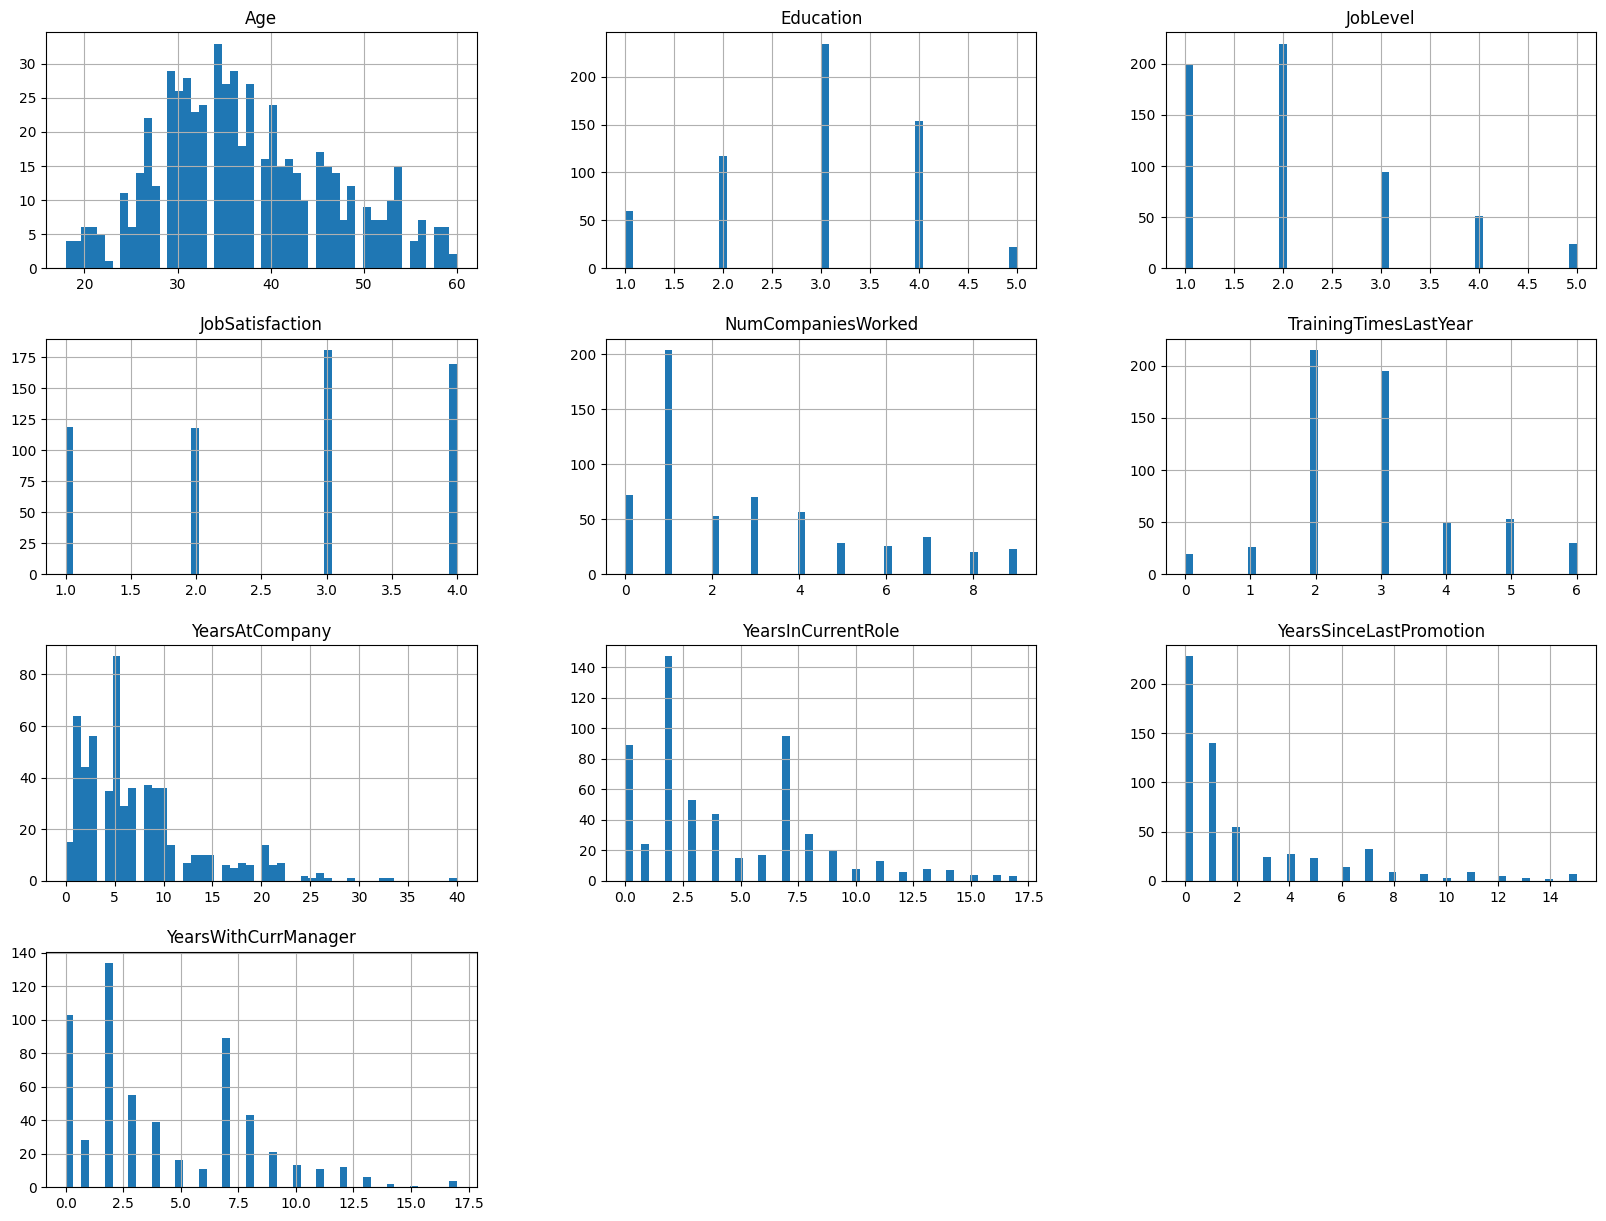

In [6]:
#Procedemos ver a travez de graficos la districuion de cada variable
data.hist(bins=50, figsize=(20,15))
plt.show()

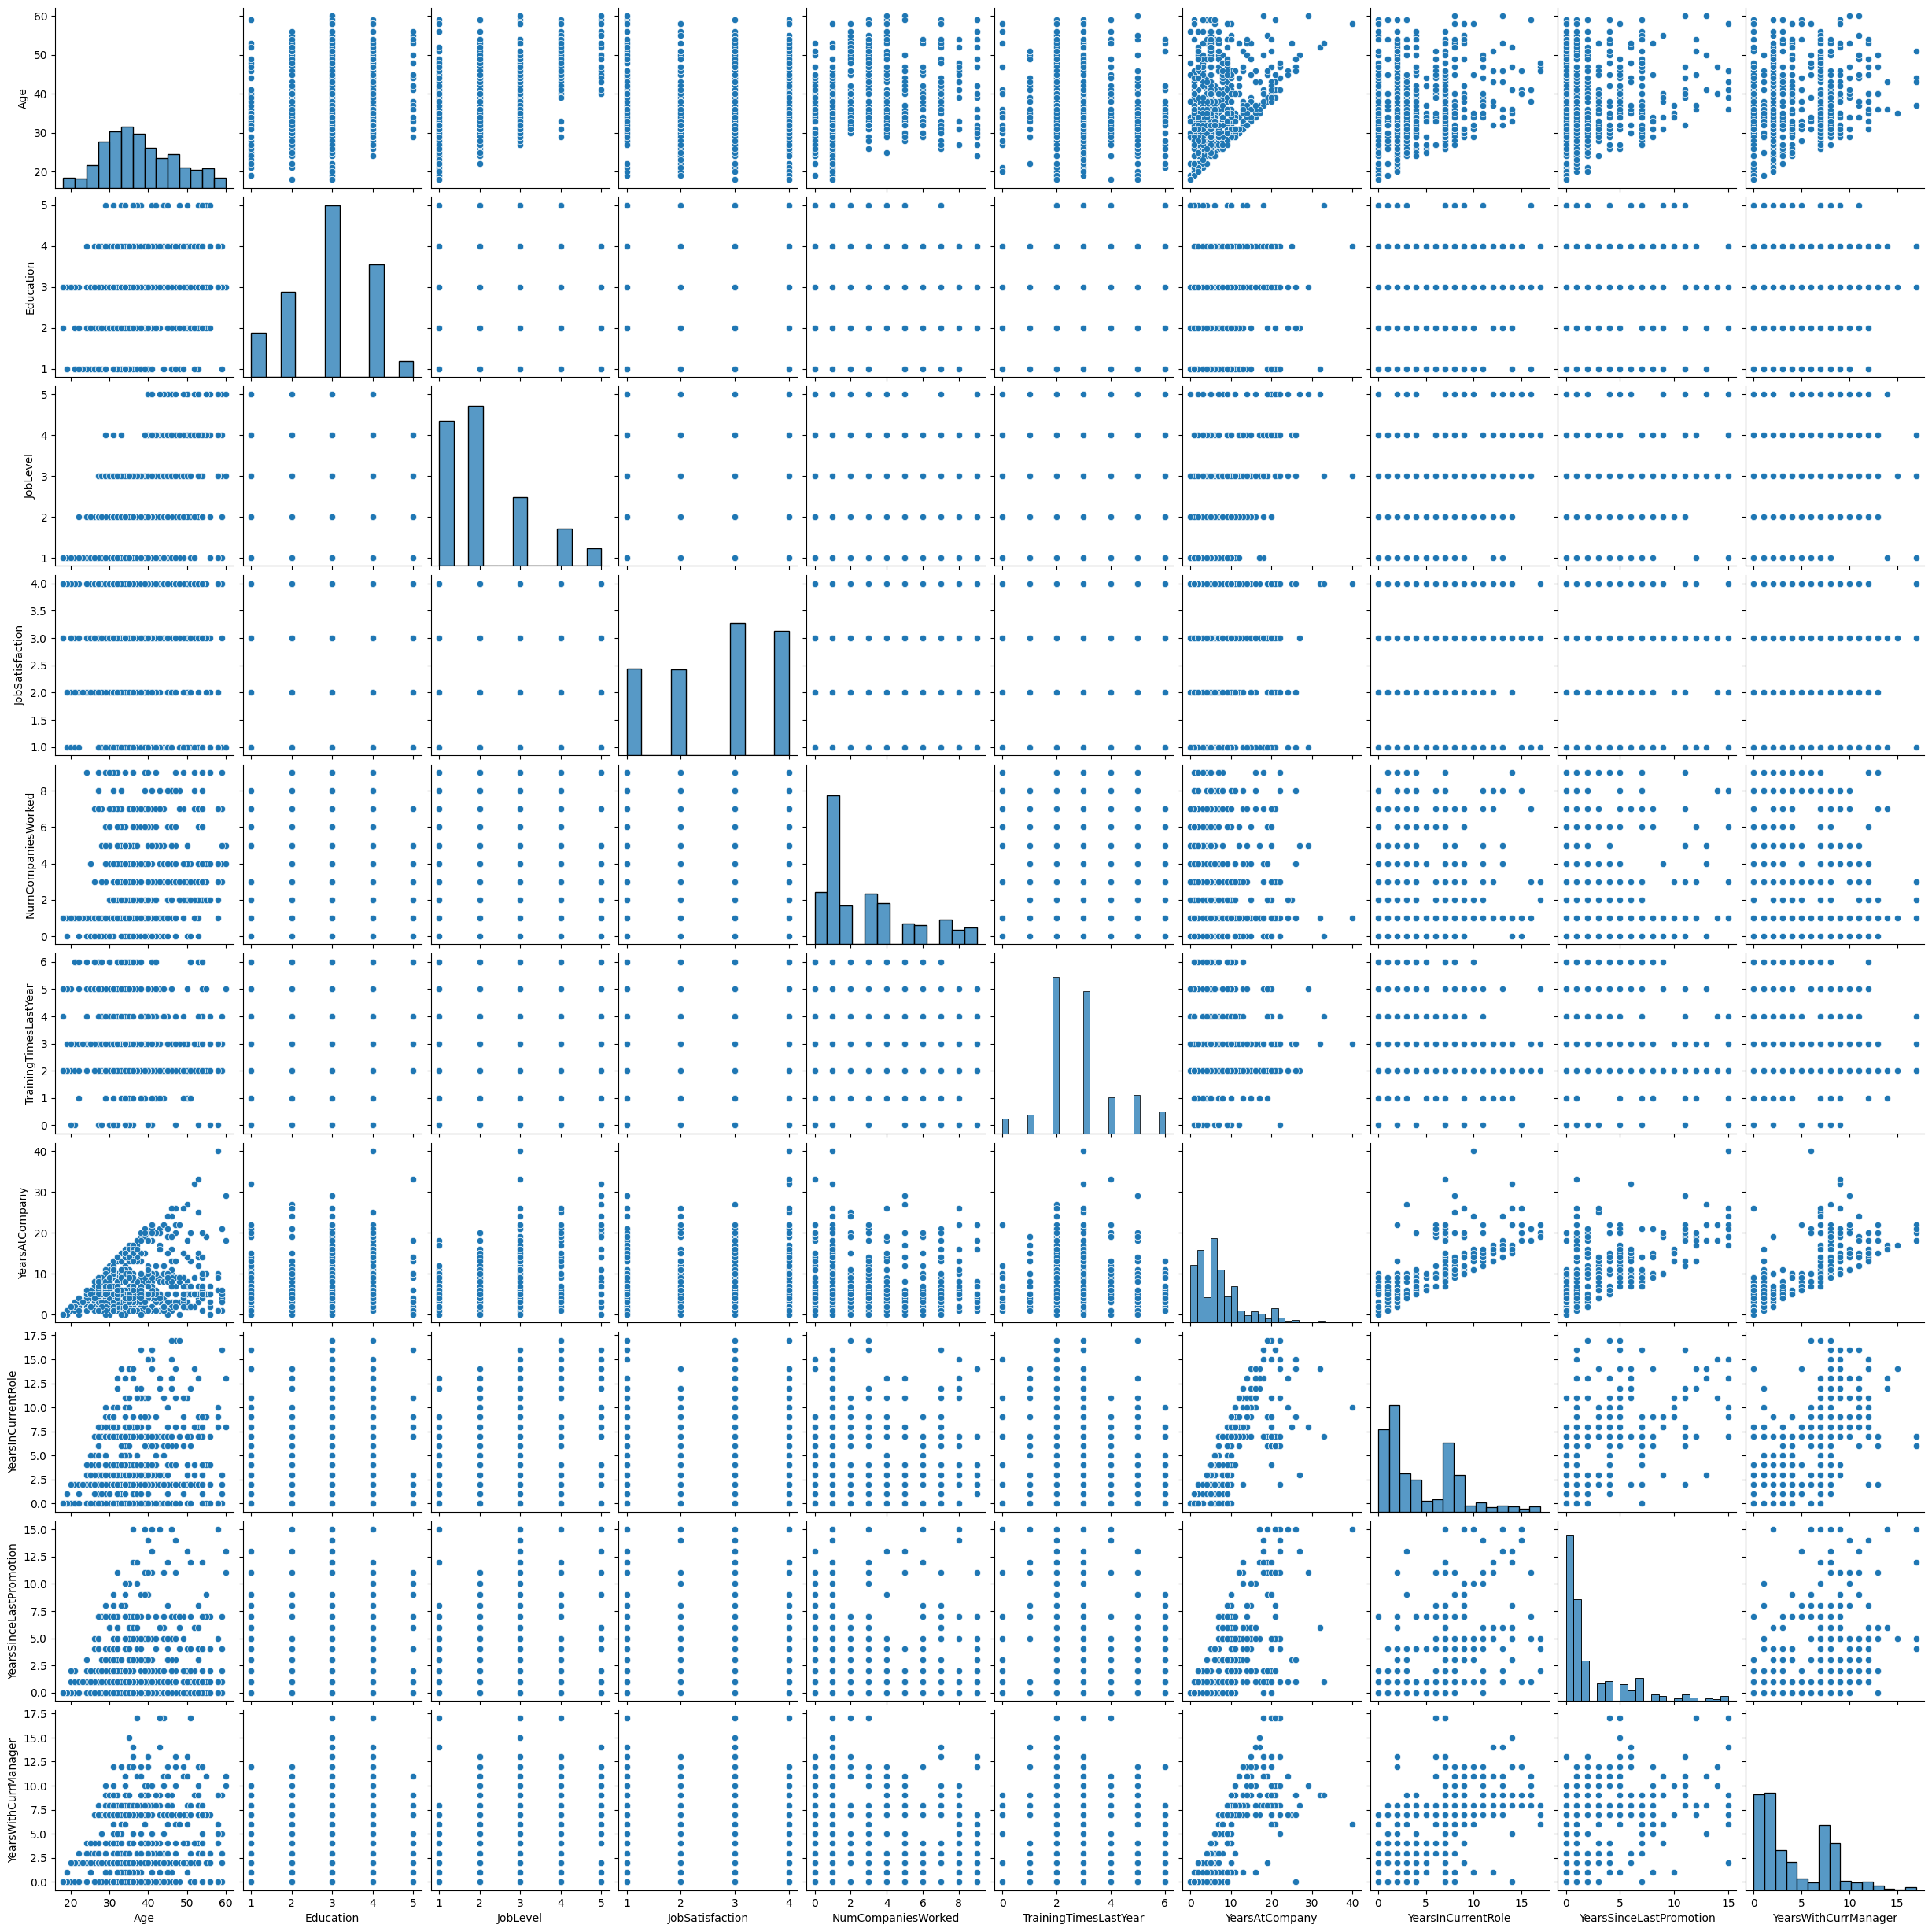

In [7]:
#Con estas graficas podemos visualmente ver si hay alguna relacion entre variables del DataSet
sns.pairplot(data)

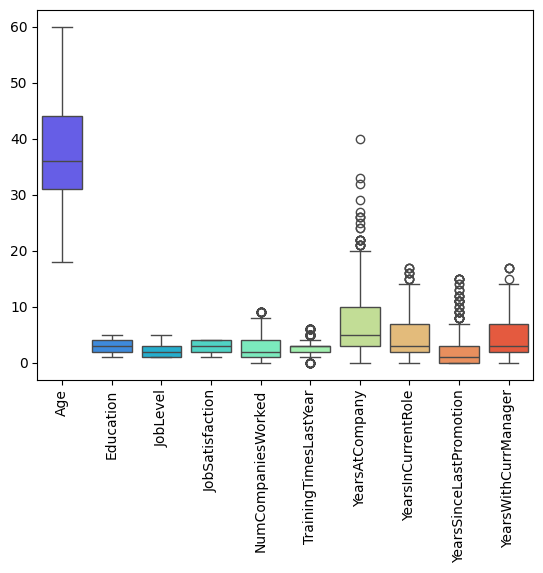

In [11]:
#revisamos con BoxPlot los valores atipicos
sns.boxplot(data=data,palette='rainbow')
plt.xticks(rotation=90)
plt.show()

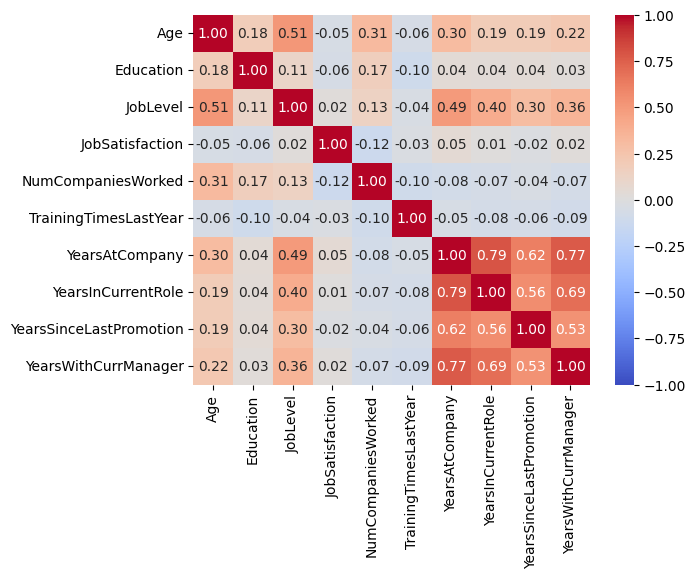

In [14]:
# A travez de este mapa de calor vemos la relaciones de las variables
#aqui concluimos que variables con las que mas estan relacionadas en este caso
#YearsInCurretRole - YearsAtCompany con una relacion de 0.79 es la mas fuerte 
#YearsAtCompany    - YearsWithCurrManager es la segunda realacion mas fuerte con un 0.77
#YearsInCurretRole - YearsWithCurrManager es la tercera mejor realcion con un 0.69
numeric_data = data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), vmin=-1, vmax=1, annot=True,fmt=".2f", cmap="coolwarm")
plt.show()

### Luego de haber explorado la data tanto grafica como exploratoria hemos visto ciertos campos que podria ser presumible datos atipicos pero 
### son posibles por consiguiente no se realiza tratamiento


In [6]:
data[data['YearsInCurrentRole'] == 0]

,Attrition,Age,Education,JobLevel,JobSatisfaction,NumCompaniesWorked,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2,No,59,3,1,1,4,3,1,0,0,0
16,No,27,4,1,1,1,6,1,0,0,0
27,No,55,3,4,3,2,2,5,0,0,2
29,No,36,3,1,4,3,3,1,0,0,0
35,Yes,20,3,1,4,1,5,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
556,No,58,3,4,4,4,2,1,0,0,0
558,Yes,27,3,1,2,1,2,1,0,0,0
562,No,31,1,1,4,1,4,1,0,0,0
567,No,25,3,1,2,4,3,2,0,1,2


In [286]:
data[data['YearsAtCompany'] == 40]

,Attrition,Age,Education,JobLevel,JobSatisfaction,NumCompaniesWorked,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
48,Yes,58,4,3,4,1,3,40,10,15,6


In [290]:
data['Attrition'].value_counts(normalize=True) * 100

Attrition
No     85.204082
Yes    14.795918
Name: proportion, dtype: float64

In [289]:
data[(data['YearsAtCompany'] >= 10) & (data['Age'] < 30)]

,Attrition,Age,Education,JobLevel,JobSatisfaction,NumCompaniesWorked,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
4,No,29,4,3,1,1,1,10,9,8,8
82,Yes,29,3,3,4,1,3,10,4,1,9
91,No,29,1,3,4,1,5,11,10,4,1
341,Yes,29,1,3,1,1,3,11,8,3,10
348,No,29,1,1,4,1,5,10,8,0,8


In [7]:
data[data['YearsAtCompany'] == 0]

,Attrition,Age,Education,JobLevel,JobSatisfaction,NumCompaniesWorked,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
39,No,22,3,1,4,1,5,0,0,0,0
67,Yes,19,1,1,1,0,5,0,0,0,0
115,No,18,3,1,3,1,2,0,0,0,0
136,No,48,1,3,3,3,3,0,0,0,0
196,No,38,1,1,1,3,3,0,0,0,0
223,No,34,5,2,1,3,3,0,0,0,0
244,No,30,3,2,4,5,4,0,0,0,0
288,Yes,29,3,1,1,6,5,0,0,0,0
385,No,45,3,5,2,3,4,0,0,0,0
403,No,18,3,1,4,1,5,0,0,0,0


In [ ]:
data[data['YearsAtCompany'] <= 30] and 

### Se  realiza la separacion de data de su respectiva etiqueta "Attrition"
### en este caso features tendra datos y target tendra la etiqueta
### adicional se agrega otro DataFrame el cual valor se convvierte a valores 0 = NO y 1 = Yes lo cual podremos usar mas adelante


In [3]:
#Separacion de Datos
features = data.iloc[:, 1:11]
target = data.iloc[:,0: 1]
targetN = data.iloc[:, 0]  
targetN = targetN.map({'Yes': 1, 'No': 0})

In [322]:
targetN.head()

0    1
1    0
2    0
3    0
4    0
Name: Attrition, dtype: int64

In [323]:
features.head()

,Age,Education,JobLevel,JobSatisfaction,NumCompaniesWorked,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,2,4,8,0,6,4,0,5
1,33,4,1,3,1,3,8,7,3,0
2,59,3,1,1,4,3,1,0,0,0
3,29,2,2,3,0,3,9,5,0,8
4,29,4,3,1,1,1,10,9,8,8


In [324]:
target.head()

,Attrition
0,Yes
1,No
2,No
3,No
4,No


### En esta seccion Normalizaremos los Datos 
### en este caso primero Normalizamos con StandardScaler para luego aplicar PCA



In [5]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
features_NormStand= scaler1.fit_transform(features)
features_NormStand = pd.DataFrame(features_NormStand, columns=features.columns)

In [23]:
features_NormStand.describe()

,Age,Education,JobLevel,JobSatisfaction,NumCompaniesWorked,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,5.880000e+02,5.880000e+02,5.880000e+02,5.880000e+02,5.880000e+02,5.880000e+02,5.880000e+02,5.880000e+02,5.880000e+02,5.880000e+02
mean,-3.383537e-16,3.474167e-17,3.625218e-17,1.510508e-18,1.812609e-17,-1.299036e-16,1.510508e-17,-7.703588e-17,-5.135726e-17,-4.531523e-17
std,1.000851e+00,1.000851e+00,1.000851e+00,1.000851e+00,1.000851e+00,1.000851e+00,1.000851e+00,1.000851e+00,1.000851e+00,1.000851e+00
min,-2.087871e+00,-1.919986e+00,-1.020498e+00,-1.537452e+00,-1.110105e+00,-2.173417e+00,-1.205371e+00,-1.171933e+00,-7.016696e-01,-1.169943e+00
25%,-6.837108e-01,-9.270647e-01,-1.020498e+00,-6.242989e-01,-7.154607e-01,-6.538341e-01,-7.053063e-01,-6.408373e-01,-7.016696e-01,-6.202612e-01
50%,-1.436491e-01,6.585705e-02,-1.071756e-01,2.888547e-01,-3.208164e-01,1.059573e-01,-3.719300e-01,-3.752895e-01,-3.958269e-01,-3.454205e-01
75%,7.204497e-01,1.058779e+00,8.061465e-01,1.202008e+00,4.684724e-01,1.059573e-01,4.615107e-01,6.869017e-01,2.158583e-01,7.539422e-01
max,2.448647e+00,2.051701e+00,2.632791e+00,1.202008e+00,2.441694e+00,2.385331e+00,5.462155e+00,3.342380e+00,3.885970e+00,3.502349e+00


### Se empieza proceso de PCA 
### explorando para ver cual es la mejor cantidad de variables vamos a redimencionar




In [6]:
from sklearn.decomposition import PCA
pca = PCA()
data_PCA= pca.fit_transform(features_NormStand)    #preferible utilizar datos normalizados con StandarScaler


<Axes: title={'center': 'PCA'}>

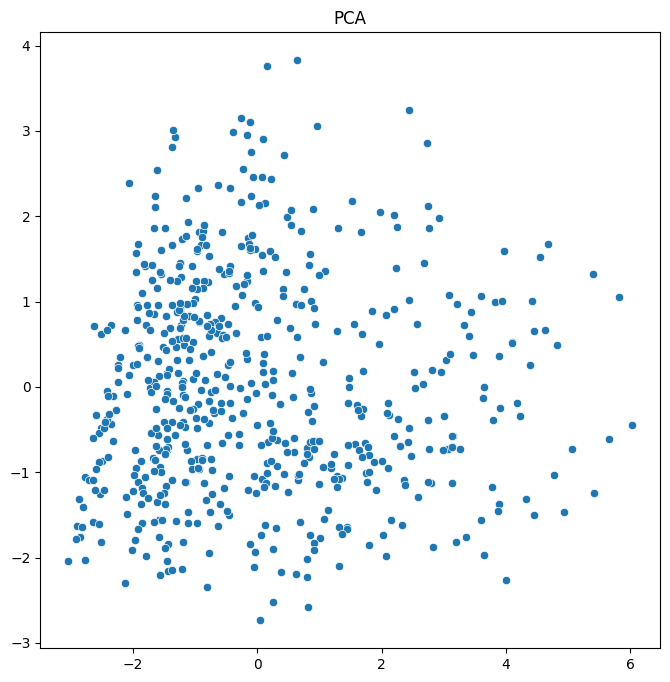

In [25]:
plt.figure(figsize=(8,8))
plt.title("PCA")
sns.scatterplot(x=data_PCA[:,0],y=data_PCA[:,1])

In [26]:
print(pca.explained_variance_ratio_)

[0.34363513 0.15726873 0.10347757 0.0993105  0.08577555 0.06782115
 0.05106493 0.04474842 0.02995756 0.01694046]


### Con el analisis viendo la grafica resualtante podemos concluir
### que la curva se cesga con un 0.9 y el numero de variables 7 lo cual nos permita poder trabajar sin problemas

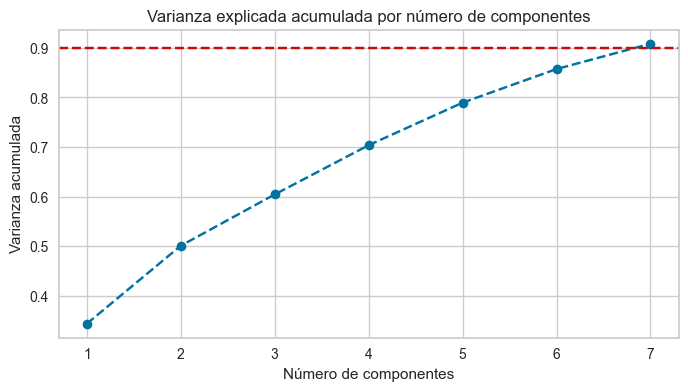

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Porcentaje de varianza que explica cada componente
explained_variance = pca.explained_variance_ratio_

# Varianza acumulada
cum_var = np.cumsum(explained_variance)

plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cum_var) + 1), cum_var, marker='o', linestyle='--')
plt.axhline(y=0.9, color='r', linestyle='--')  # Línea de corte, por ejemplo 90%
plt.title('Varianza explicada acumulada por número de componentes')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.grid(True)
plt.show()


In [7]:
#procedmos aplicar n_components=7
pca = PCA(n_components=7)
features_PCA = pca.fit_transform(features_NormStand)
features_PCA = pd.DataFrame(features_PCA)

# Algoritmos de Clusterización

### Empezamos buscando a travez del Método del codo para identificar K
### esto solo nos va dar un punto de partida, luego de esto deberemos igual validar si es lo mejor

In [8]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [9]:
distortions = []
sill = []
K = range(2,5)
for k in K:
    kmeansModel = KMeans(n_clusters=k, random_state=42)
    kmeansModel.fit(features_PCA)
    distortions.append(kmeansModel.inertia_)
  # sill.append(metrics.silhouette_score(data_CX, kmeanModel.labels_))

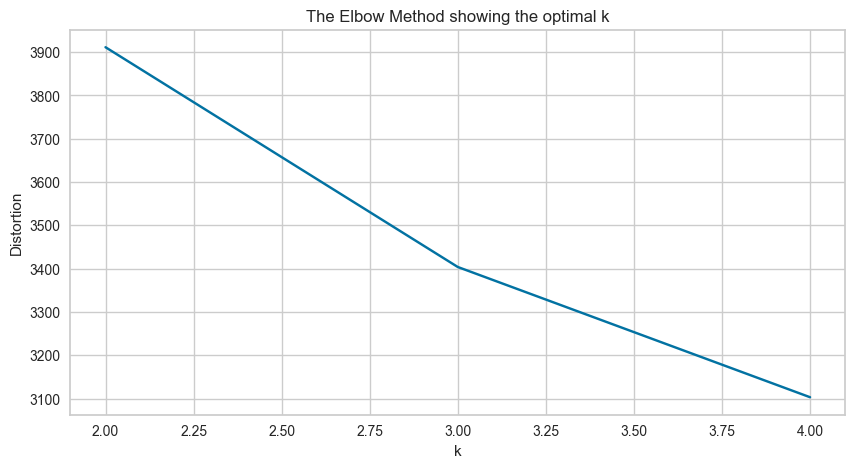

In [10]:
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

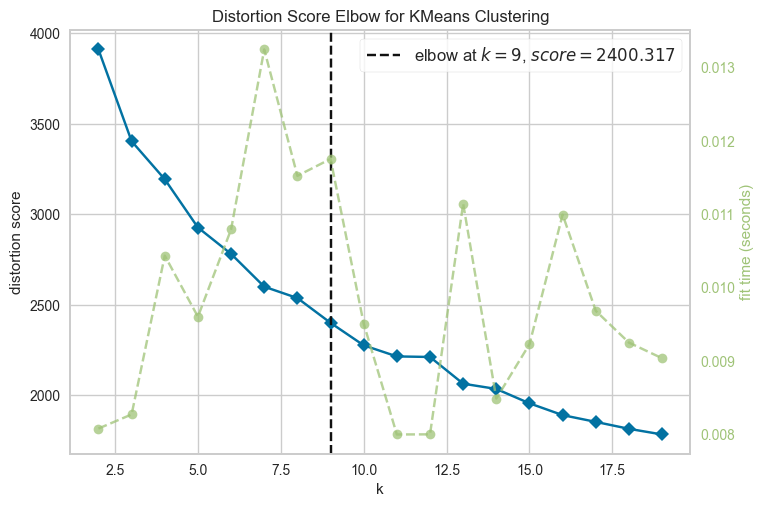

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [105]:

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import numpy as np
vzr = KElbowVisualizer(KMeans(), k=(2, 20))
vzr.fit(features_PCA)
vzr.poof()


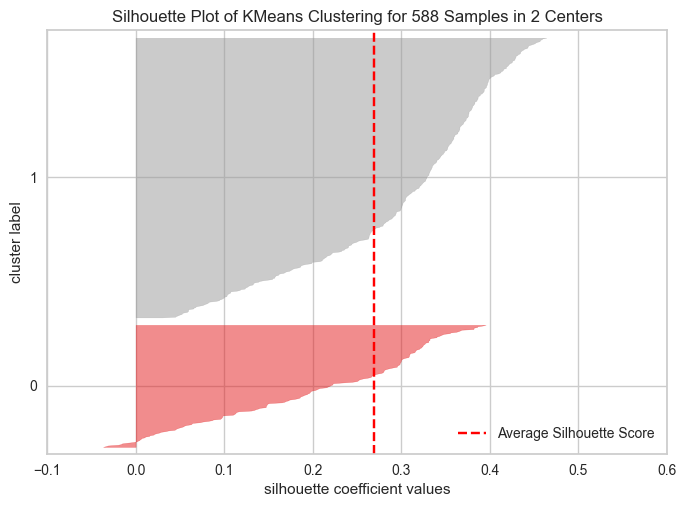

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 588 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [12]:
from yellowbrick.cluster import SilhouetteVisualizer

clf = KMeans(n_clusters=2)
vzr = SilhouetteVisualizer(clf)
vzr.fit(features_PCA)
vzr.poof()


## Aplicacion de Kmeans
### Una vez Identificado que esta dentro de 2 y 3 el K
### Elegimos 2 por cuanto nos da mas la Metrica de silhoutte aunque el valor sumamente bajo pero es lo mejor que hemos podido obtener 0.27

In [13]:
cl_kmeans = KMeans(n_clusters =2, random_state = 42).fit(features_PCA)

print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(features_PCA, cl_kmeans.labels_))

Silhouette Coefficient: 0.270


In [14]:
inercia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state = 42).fit(features_PCA)
    inercia.append(kmeans.inertia_)

In [21]:
cl_kmeans = KMeans(n_clusters =2, random_state = 42).fit(features_PCA)

print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(features_PCA, cl_kmeans.labels_))

Silhouette Coefficient: 0.270


In [22]:
print(cl_kmeans.labels_)

[0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1
 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1
 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1
 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1
 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0
 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0
 1 0 1 1 0 1 0 0 0 0 0 0 

In [23]:
#visualizamos la Metrica por cada etiqueta 
silhouette_values_KM = metrics.silhouette_samples(features_PCA, cl_kmeans.labels_)
means_lst1 = []
for label in range(2):
    means_lst1.append(silhouette_values_KM[cl_kmeans.labels_ == label].mean())
print (means_lst1)

[np.float64(0.29890298242433155), np.float64(0.20286782867547695)]


In [24]:
#contamos cuantas de cada target tenemos
import collections
print(collections.Counter(cl_kmeans.labels_))

Counter({np.int32(0): 409, np.int32(1): 179})


## Garfica de los centroides y datos despues de la clusterización
### A Nivel de la grafica podemos detenerminar claramente 2 grupos definidos con la metrica Silhouette de 0.27

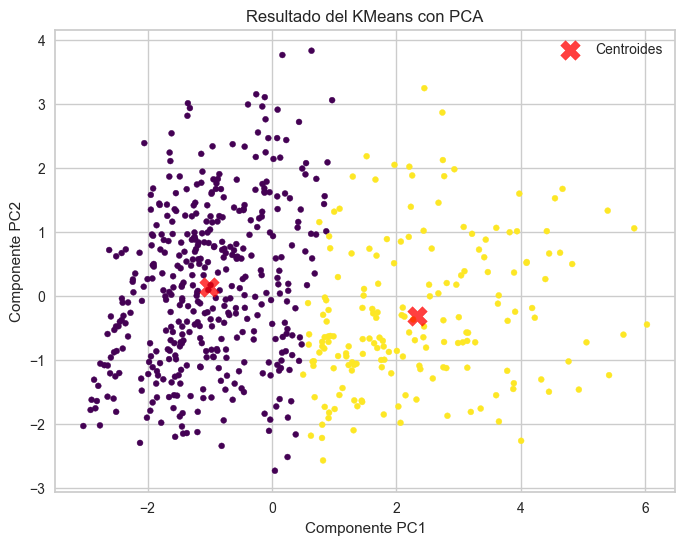

In [32]:
import matplotlib.pyplot as plt
labels = cl_kmeans.labels_

plt.figure(figsize=(8,6))
# Graficammos los dastos de la PCA con las eiquetas resultantes de Kmeans
plt.scatter(features_PCA.values[:, 0], features_PCA.values[:, 1], c=labels, cmap='viridis', s=18)

# Grafica el Centroide con Color Rojo X
centroids = cl_kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroides')

plt.title('Resultado del KMeans con PCA')
plt.xlabel('Componente PC1')
plt.ylabel('Componente PC2')
plt.legend()
plt.grid(True)
plt.show()

## Clusterizacion Jerarquicos
### Aplicamos los datos de PCA con metodo Ward para la identificacion visual

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from sklearn import metrics

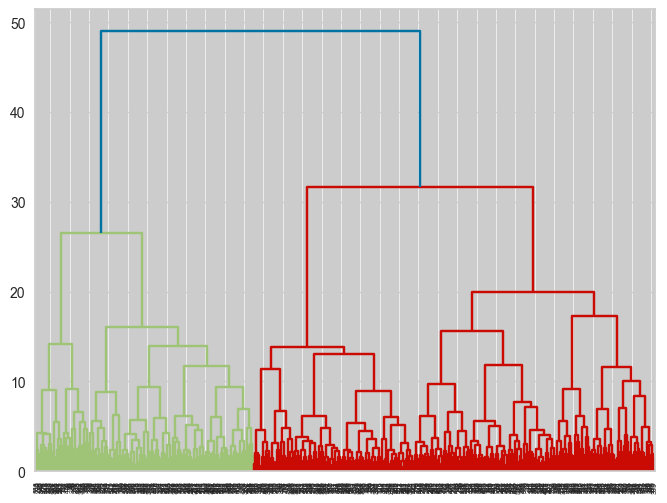

In [36]:
clusters = hierarchy.linkage(features_PCA, method="ward")
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)

### Graficamente podemos ver 2 grupos asi que tomamos eso para numerod el cluster

In [37]:
cl_JERARQUICO = AgglomerativeClustering(n_clusters=2, linkage="ward").fit(features_PCA)

print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(features_PCA, cl_JERARQUICO.labels_))

Silhouette Coefficient: 0.220


In [38]:
import collections
print(collections.Counter(cl_JERARQUICO.labels_))

Counter({np.int64(0): 381, np.int64(1): 207})


In [39]:
silhouette_values_jerarquico = metrics.silhouette_samples(features_PCA, cl_JERARQUICO.labels_)

means_lst3 = []
for label in range(2):
    means_lst3.append(silhouette_values_jerarquico[cl_JERARQUICO.labels_ == label].mean())


In [40]:
print(means_lst3)

[np.float64(0.24785363469218027), np.float64(0.16757986004741046)]


## Garfica datos despues de la clusterización con al algoritmo Jerarquico
### A Nivel de la grafica podemos detenerminar claramente 2 grupos definidos aunque hay puntos que se solapan mas y con la metrica Silhouette de 0.22

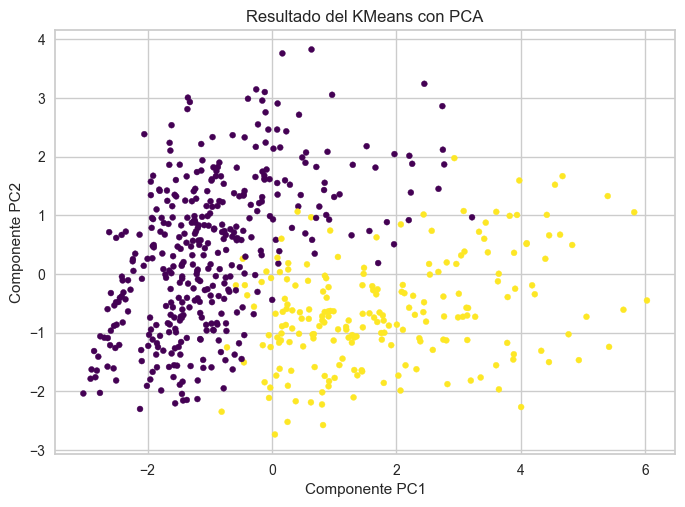

In [44]:
#sns.scatterplot(data= features_PCA, x= features_PCA.iloc[: , 0], y=features_PCA.iloc[:,1], hue=cl_JERARQUICO.labels_)
plt.scatter(features_PCA.values[:, 0], features_PCA.values[:, 1], c=cl_JERARQUICO.labels_, cmap='viridis', s=18)
plt.title('Resultado del KMeans con PCA')
plt.xlabel('Componente PC1')
plt.ylabel('Componente PC2')
plt.grid(True)
plt.show()

# Algoritmos Supervisado

### Se empieza con la division del data set en este caso 70% Entrenamiento y 30% para test

In [49]:
var_count = targetN.value_counts()
print(var_count)

Attrition
0    501
1     87
Name: count, dtype: int64


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
train_X, test_X, train_Y, test_Y = train_test_split(features, targetN, test_size=0.3, random_state=46, shuffle=True)

In [52]:
train_X.describe()

,Age,Education,JobLevel,JobSatisfaction,NumCompaniesWorked,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000
mean,37.917275,2.951338,2.160584,2.720195,2.895377,2.763990,7.396594,4.515815,2.416058,4.209246
std,9.364331,1.006112,1.134172,1.100801,2.545441,1.282249,6.283613,3.919509,3.441445,3.604876
min,18.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,2.000000,1.000000,2.000000,1.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,3.000000,2.000000,3.000000,2.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,45.000000,4.000000,3.000000,4.000000,4.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,5.000000,5.000000,4.000000,9.000000,6.000000,40.000000,17.000000,15.000000,17.000000


### Se empieza con el Balanceo por medio del Metodo OverSampling

In [136]:
!pip install imbalanced-learn


   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   ---------------------------------------- 2/2 [imbalanced-learn]



In [53]:
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
over_sampler = SMOTE(k_neighbors=5)
train_XB, train_YB = over_sampler.fit_resample(train_X, train_Y)
print(f"Training target statistics: {Counter(train_Y)}")

Training target statistics: Counter({0: 349, 1: 62})


In [54]:
print(f"Training target statistics: {Counter(train_YB)}")

Training target statistics: Counter({0: 349, 1: 349})


# Arboles de Descision
## Una vez Balanceado la Data se procede con la aplicacion del primer Algoritmo mediante criterio gini y una profundidad de 20 

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report

In [69]:
#Entrenar el modelo con  DescisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 20, criterion= "gini").fit(train_XB, train_YB)  # default Gini, probar con entropy DecisionTreeClassifier(criterion="entropy", max_depth=3


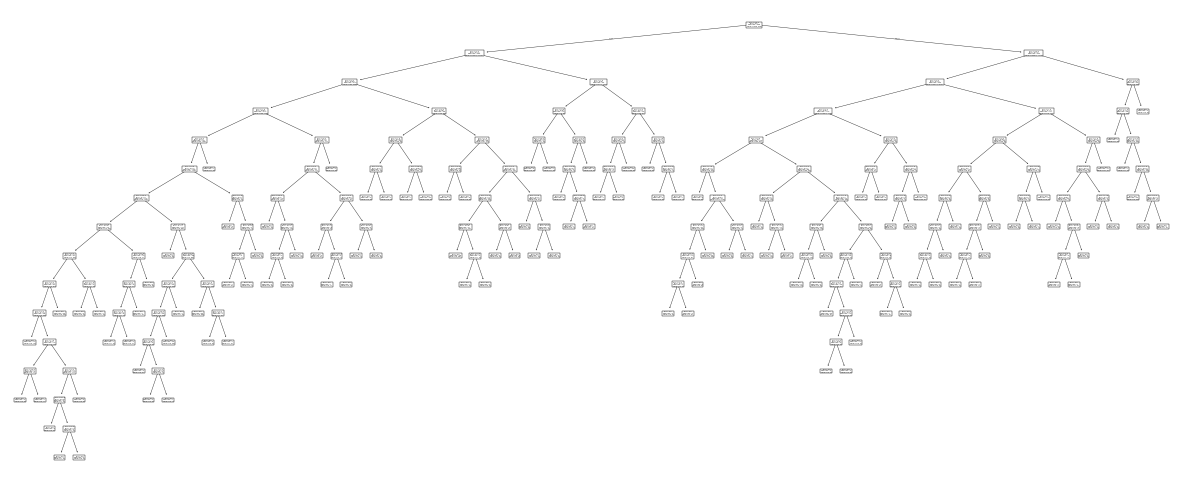

In [70]:
plt.figure(figsize=(15, 6))
tree.plot_tree(dtree_model)
plt.show()

In [71]:
feature_cols= pd.DataFrame(data= None, columns= features.columns)

In [72]:
print(feature_cols)

Empty DataFrame
Columns: [Age, Education, JobLevel, JobSatisfaction, NumCompaniesWorked, TrainingTimesLastYear, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []


In [73]:
feature_cols= feature_cols.columns.tolist()

In [74]:
class_cols= ['1', '2','3' ]

print(class_cols)

['1', '2', '3']


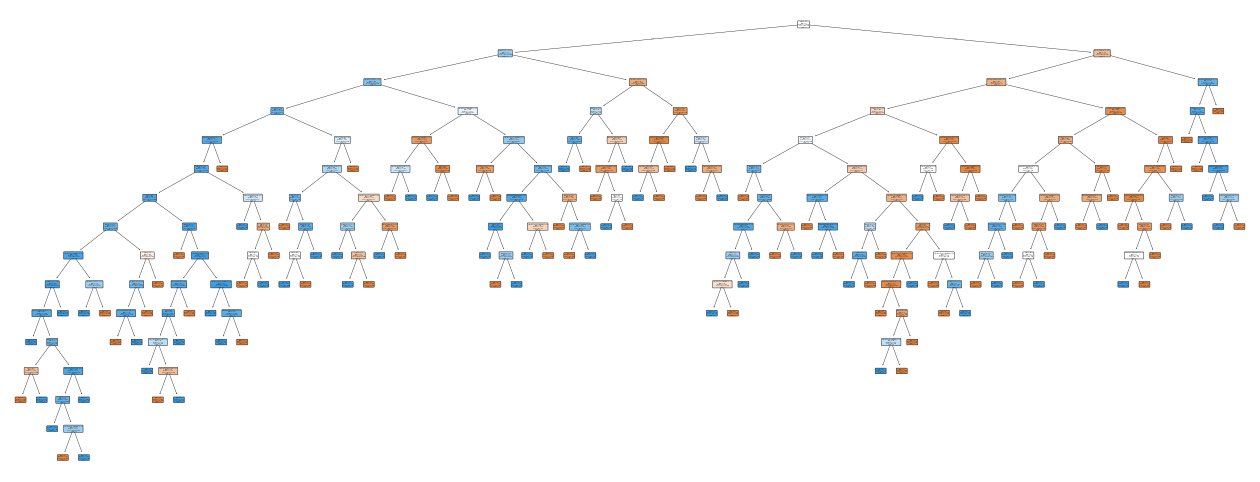

In [75]:
from sklearn import tree
plt.figure(figsize=(16, 6))
tree.plot_tree(dtree_model,
          feature_names=feature_cols,
          class_names=class_cols,
          rounded=True, # Rounded node edges
          filled=True, # Adds color accoding to class
          proportion=True);

In [78]:
pred_Y_dt = dtree_model.predict(test_X)

In [79]:
print (pred_Y_dt)

[0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0]


In [80]:
conf_matrix_dt = confusion_matrix(test_Y, pred_Y_dt)
classification_rep_dt = classification_report(test_Y, pred_Y_dt)

In [81]:
print("Matriz de Confusión:\n", conf_matrix_dt)
print("\nInforme de Clasificación:\n", classification_rep_dt)

Matriz de Confusión:
 [[118  34]
 [ 17   8]]

Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.87      0.78      0.82       152
           1       0.19      0.32      0.24        25

    accuracy                           0.71       177
   macro avg       0.53      0.55      0.53       177
weighted avg       0.78      0.71      0.74       177



In [82]:
accuracy = dtree_model.score(test_X, test_Y)
print (accuracy)

0.711864406779661


### Los resultados de la Matriz de Confusion nos pemite entender que para 
### la etiqueta con valor 0 que data Original es No la presicion es de 0.87 teniendo un acierto de 118 Registros y un error de 17
### la etiqueta con valor 1 que data Original es SI la presicion es de 0.19 teniendo un acierto de 8 Registros y un error de 34
### El Accuracy quedo en 0.71

# --------------------------------------------------------------------------------

# KNN
## Una vez Balanceado la Data se procede con la aplicacion del primer Algoritmo mediante criterio gini y una profundidad de 20 

In [97]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2).fit(train_XB, train_YB)

In [98]:
knn_predictions = knn.predict(test_X)
print(knn_predictions)

[0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0
 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1]


In [101]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_Y, knn_predictions)
print (cm)

[[128  24]
 [ 11  14]]


In [102]:
from sklearn.metrics import classification_report
targets = ['0', '1']
print(classification_report(test_Y, knn_predictions, target_names=targets))  # DT classification report

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       152
           1       0.37      0.56      0.44        25

    accuracy                           0.80       177
   macro avg       0.64      0.70      0.66       177
weighted avg       0.84      0.80      0.82       177



In [103]:
accuracy = knn.score(test_X, test_Y)
print (accuracy)

0.8022598870056498


### Los resultados de la Matriz de Confusion nos pemite entender que para 
### la etiqueta con valor 0 que data Original es No la presicion es de 0.92 teniendo un acierto de 128 Registros y un error de 11
### la etiqueta con valor 1 que data Original es SI la presicion es de 0.37 teniendo un acierto de 14 Registros y un error de 24
### El Accuracy quedo en 0.80


<div style="float: center; width: 100%;">
<p style="margin: 0; padding-top: 45px; text-align:center; color:#ffff00; font-size:32px">Conclusiones del Trabajo Final</p>
<p style="margin: 0; text-align:Left; color:#BA8E23; font-size:24px">El resumen de los Resultados con las Metricas nos arrojado</p>
<p style="margin: 0; text-align:Left; color:#FFFFC5; font-size:15px">Kmeans= Silhouette de 0.27</p>
<p style="margin: 0; text-align:Left; color:#FFFFC5; font-size:15px">Aglomerativo  = Silhouette de 0.22</p>
<p style="margin: 0; text-align:Left; color:#FFFFC5; font-size:15px">Arboles Decisión = Accuracy quedo en 0.71</p>
<p style="margin: 0; text-align:Left; color:#FFFFC5; font-size:15px">KNN = Accuracy quedo en 0.80</p>
</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

#### Como resultado General vemos que el mejor resultado aplicando los requerimientos pedidos como PCA en los clustering y oversampling en clasificacion
#### es KNN con un 0.80 en la metrica
#### podemos concluir que tanto los Arboles de Decision como KNN mostraron mayores resultados que los de clustering
